In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#from __future__ import division

#set seed for reproducible use of PRNG
np.random.seed(seed=42)

#set length of dummy data set
length = 5

#set number of years to forecast
k = 8    

In [46]:
#define dummy input data and dummy variables for demand
ID = np.arange(length)
population = np.random.randint(low=4000, high=10000, size=length)
area = np.random.randint(low=1, high=50, size=length)
user_demand = [4]*length
penetration = 0.8
OBF = 50

#temporal  demand growth
a = 1.20 #Demand Growth
b = 1.10 #Population Growth
c = 1.15 #User_throughput

In [47]:
#define demand function
def calc_demand (population, area, user_demand, penetration):
    users = population*penetration
    density = np.round(users / area, 2) #km2
    user_throughput = user_demand #temporary calculation!!
    capacity_required_km2 = user_throughput * density
    area_demand = np.round(capacity_required_km2 / OBF, 2)
    return pd.DataFrame({'ID':ID,
                         'population':population, 
                         'area': area,
                         #'users': users, 
                         #'density': density,
                         'user_throughput': user_throughput, 
                         'area_demand': area_demand})   

In [48]:
#when you call the function, store the output as an object 
area_demand = calc_demand(population, area, user_demand, penetration)

area_demand.head(n=10)

,ID,area,area_demand,population,user_throughput
0,0,21,14.81,4860,4
1,1,39,15.41,9390,4
2,2,19,31.08,9226,4
3,3,23,25.58,9191,4
4,4,11,45.22,7772,4


In [49]:
area_demand = (area_demand[['ID','area']].merge(pd.concat([(area_demand[['area_demand','population', 'user_throughput']].mul([pow(a,i),pow(b,i), pow(c,i)])).assign(year=i+1) for i in range(k)]), 
                           left_index=True, right_index=True)
                           .sort_values(by='year'))

area_demand.sort_values(['year', 'ID'], ascending=[True, True], inplace=True)

area_demand.head(n=20)

,ID,area,area_demand,population,user_throughput,year
0,0,21,14.81000,4860.000,4.0000,1
1,1,39,15.41000,9390.000,4.0000,1
2,2,19,31.08000,9226.000,4.0000,1
3,3,23,25.58000,9191.000,4.0000,1
4,4,11,45.22000,7772.000,4.0000,1
0,0,21,17.77200,5346.000,4.6000,2
1,1,39,18.49200,10329.000,4.6000,2
2,2,19,37.29600,10148.600,4.6000,2
3,3,23,30.69600,10110.100,4.6000,2
4,4,11,54.26400,8549.200,4.6000,2


In [50]:
area_demand.shape

(40, 6)

In [51]:
#define dummy input data and dummy variables for supply
spectrum_bandwidth = [20]*length
sites = np.random.randint(low=1, high=10, size=length)
efficiency = [3]*length

In [52]:
def calc_supply (spectrum_bandwidth, sites, efficiency):
    ID = np.arange(length)
    cells = sites * 3
    total_capacity = spectrum_bandwidth * sites * cells * efficiency/1000
    area_supply = np.round(total_capacity / area, 0)
    return pd.DataFrame({'ID':ID,
                         'sites':sites, 
                         'cells': cells,
                         'area_supply': area_supply,
                         'new_sites': '' })

In [53]:
#temporal  supply growth
a = 1.00 #supply growth
b = 1.00 #cells
c = 1.00 #new sites growth
#d = 1.00 #sites growth

In [54]:
area_supply = calc_supply(spectrum_bandwidth, sites, efficiency)

area_supply.head(n=10)

,ID,area_supply,cells,new_sites,sites
0,0,1.0,24,,8
1,1,0.0,15,,5
2,2,0.0,12,,4
3,3,1.0,24,,8
4,4,1.0,24,,8


In [55]:
area_supply.shape

(5, 5)

In [56]:
area_supply = (area_supply[['ID','new_sites']].merge(pd.concat([(area_supply[['area_supply','cells', 'sites']].mul([pow(a,i),pow(b,i), pow(c,i)])).assign(year=i+1) for i in range(k)]), 
                           left_index=True, right_index=True)
                           .sort_values(by='year'))

area_supply.sort_values(['year', 'ID'], ascending=[True, True], inplace=True)

area_supply.head(n=20)

,ID,new_sites,area_supply,cells,sites,year
0,0,,1.0,24.0,8.0,1
1,1,,0.0,15.0,5.0,1
2,2,,0.0,12.0,4.0,1
3,3,,1.0,24.0,8.0,1
4,4,,1.0,24.0,8.0,1
0,0,,1.0,24.0,8.0,2
1,1,,0.0,15.0,5.0,2
2,2,,0.0,12.0,4.0,2
3,3,,1.0,24.0,8.0,2
4,4,,1.0,24.0,8.0,2


In [57]:
area_supply.shape

(40, 6)

In [58]:
def calc_margin (ID, demand, supply, year):
    margin = supply - demand
    year = year
    return pd.DataFrame({'margin':margin})

In [59]:
margin = calc_margin(area_demand.ID, area_demand.area_demand, area_supply.area_supply, area_supply.year)

margin.head(n=10)   


,margin
0,-13.810
1,-15.410
2,-31.080
3,-24.580
4,-44.220
0,-16.772
1,-18.492
2,-37.296
3,-29.696
4,-53.264


In [60]:
area_supply = area_supply.drop('ID', 1)
area_supply = area_supply.drop('year', 1)

#concat all data
all_data = pd.concat([area_demand, area_supply, margin], axis=1)

all_data.head(n=10)

,ID,area,area_demand,population,user_throughput,year,new_sites,area_supply,cells,sites,margin
0,0,21,14.810,4860.0,4.0,1,,1.0,24.0,8.0,-13.810
1,1,39,15.410,9390.0,4.0,1,,0.0,15.0,5.0,-15.410
2,2,19,31.080,9226.0,4.0,1,,0.0,12.0,4.0,-31.080
3,3,23,25.580,9191.0,4.0,1,,1.0,24.0,8.0,-24.580
4,4,11,45.220,7772.0,4.0,1,,1.0,24.0,8.0,-44.220
0,0,21,17.772,5346.0,4.6,2,,1.0,24.0,8.0,-16.772
1,1,39,18.492,10329.0,4.6,2,,0.0,15.0,5.0,-18.492
2,2,19,37.296,10148.6,4.6,2,,0.0,12.0,4.0,-37.296
3,3,23,30.696,10110.1,4.6,2,,1.0,24.0,8.0,-29.696
4,4,11,54.264,8549.2,4.6,2,,1.0,24.0,8.0,-53.264


In [61]:
#put a name on the margin column as it was previously not named
#all_data.rename(columns={0:'margin'}, inplace=True)

lookup_df = pd.DataFrame({'spectrum_lookup' : (2,4,6,8,10,12,14,16),
                        'sites_lookup' : (5,10,15,20,25,30,35,40),
                        'supply_lookup' : (50,100,150,200,250,300,350,400)})

lookup_df.head(n=10)

,sites_lookup,spectrum_lookup,supply_lookup
0,5,2,50
1,10,4,100
2,15,6,150
3,20,8,200
4,25,10,250
5,30,12,300
6,35,14,350
7,40,16,400


In [62]:
def lookup_new_sites(row):
    if row['margin'] < 0:
        # get the minimum number of sites that cover the current supply deficit
        number_new = lookup_df.loc[lookup_df['supply_lookup'] >= abs(row['area_demand']), 'sites_lookup'].values[0]
        final_number = number_new - row['sites']
        if final_number < 0:
            return 0
        else:
            return final_number
    else:
        return 0

In [63]:
all_data['new_sites'] = all_data.apply(lookup_new_sites, axis=1)

# all_data['new_sites'] =int(yahoostock.get_price('RIL.BO'));

all_data.head(n=10)

,ID,area,area_demand,population,user_throughput,year,new_sites,area_supply,cells,sites,margin
0,0,21,14.810,4860.0,4.0,1,0.0,1.0,24.0,8.0,-13.810
1,1,39,15.410,9390.0,4.0,1,0.0,0.0,15.0,5.0,-15.410
2,2,19,31.080,9226.0,4.0,1,1.0,0.0,12.0,4.0,-31.080
3,3,23,25.580,9191.0,4.0,1,0.0,1.0,24.0,8.0,-24.580
4,4,11,45.220,7772.0,4.0,1,0.0,1.0,24.0,8.0,-44.220
0,0,21,17.772,5346.0,4.6,2,0.0,1.0,24.0,8.0,-16.772
1,1,39,18.492,10329.0,4.6,2,0.0,0.0,15.0,5.0,-18.492
2,2,19,37.296,10148.6,4.6,2,1.0,0.0,12.0,4.0,-37.296
3,3,23,30.696,10110.1,4.6,2,0.0,1.0,24.0,8.0,-29.696
4,4,11,54.264,8549.2,4.6,2,2.0,1.0,24.0,8.0,-53.264


In [64]:
all_data = all_data.reset_index()

output = all_data.assign(annual_change=all_data.groupby("ID")['new_sites'].apply(lambda x:x.diff().fillna(x)))

output.head(n=10)

,index,ID,area,area_demand,population,user_throughput,year,new_sites,area_supply,cells,sites,margin,annual_change
0,0,0,21,14.810,4860.0,4.0,1,0.0,1.0,24.0,8.0,-13.810,0.0
1,1,1,39,15.410,9390.0,4.0,1,0.0,0.0,15.0,5.0,-15.410,0.0
2,2,2,19,31.080,9226.0,4.0,1,1.0,0.0,12.0,4.0,-31.080,1.0
3,3,3,23,25.580,9191.0,4.0,1,0.0,1.0,24.0,8.0,-24.580,0.0
4,4,4,11,45.220,7772.0,4.0,1,0.0,1.0,24.0,8.0,-44.220,0.0
5,0,0,21,17.772,5346.0,4.6,2,0.0,1.0,24.0,8.0,-16.772,0.0
6,1,1,39,18.492,10329.0,4.6,2,0.0,0.0,15.0,5.0,-18.492,0.0
7,2,2,19,37.296,10148.6,4.6,2,1.0,0.0,12.0,4.0,-37.296,0.0
8,3,3,23,30.696,10110.1,4.6,2,0.0,1.0,24.0,8.0,-29.696,0.0
9,4,4,11,54.264,8549.2,4.6,2,2.0,1.0,24.0,8.0,-53.264,2.0


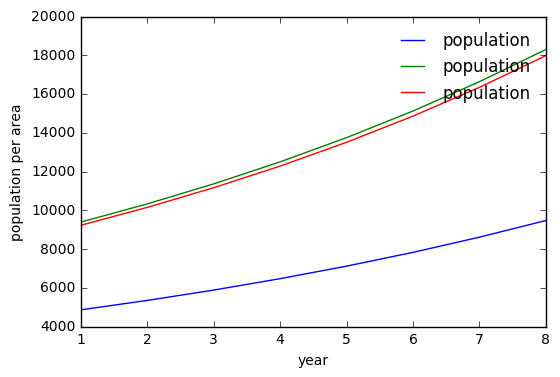

In [65]:
plt.plot(output.year[output.area == 21],output.population [output.area == 21])
plt.plot(output.year[output.area == 39],output.population [output.area == 39])
plt.plot(output.year[output.area == 19],output.population [output.area == 19])
plt.xlabel('year')
plt.ylabel('population per area')
plt.legend(framealpha=0, frameon=False)

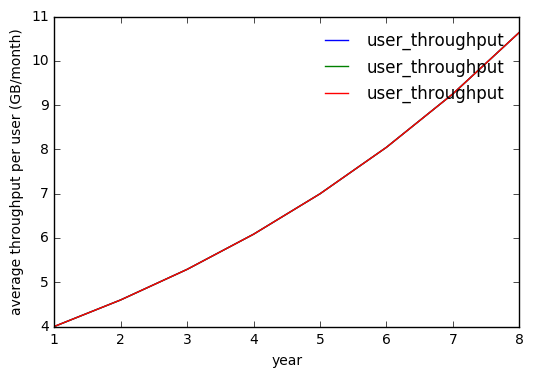

In [67]:
plt.plot(output.year[output.area == 21],output.user_throughput [output.area == 21])
plt.plot(output.year[output.area == 39],output.user_throughput [output.area == 39])
plt.plot(output.year[output.area == 19],output.user_throughput [output.area == 19])
plt.xlabel('year')
plt.ylabel('average throughput per user (GB/month)')
plt.legend(framealpha=0, frameon=False)